In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, preprocessing, metrics
from sklearn.decomposition import PCA
%mastplotlib inline

UsageError: Line magic function `%mastplotlib` not found.


In [2]:
iris_data = datasets.load_iris(as_frame=True)
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris_data.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
# Get the features and label
df = iris_data.frame
features = iris_data.data
label = iris_data.target

In [10]:
# 3. EDA
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

In [14]:
# 4a. Train test split
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, label, shuffle=True, train_size=0.5, random_state=42)

In [11]:
# 4. Perform feature scaling
standard_scaler = preprocessing.StandardScaler()
features_scaled = standard_scaler.fit_transform(features)

In [17]:
# 5. PCA for dimensionally reduction
pca = PCA(n_components=2)
principal_component = pca.fit_transform(features_scaled)
pc_train = pca.fit_transform(x_train)
pc_test = pca.fit_transform(x_test)

In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Sample data
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

print("Original Data:\n", data)
print("Scaled Data:\n", scaled_data)


Original Data:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Scaled Data:
 [[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [16]:
variance = pca.explained_variance_ratio_
print(variance)

[0.93131522 0.05121083 0.01257583 0.00489812]


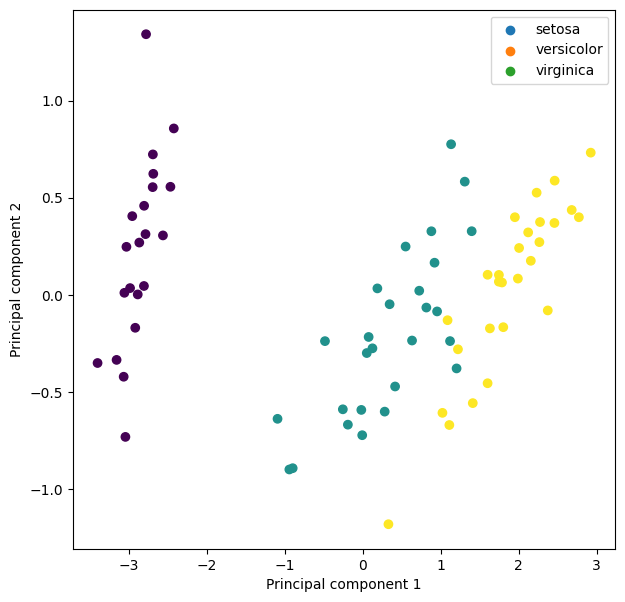

In [23]:
plt.figure(figsize=(7,7))
for x in iris_data.target_names:
    pc_slide = pc_train[y_train == x]
    plt.scatter(pc_slide[:, 0], pc_slide[:, 1])
plt.scatter(pc_train[:, 0], pc_train[:, 1], c=y_train)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.legend(iris_data.target_names)

In [25]:
# Try the new features on a ML model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(pc_train, y_train)
predictions = model.predict(pc_test)
print(model.score(pc_test, y_test))
print(metrics.f1_score(y_test, predictions, average='weighted'))

0.96
0.9598291409587091


#Practice
Try to apply what you have learnt in this tutorial using the breast cancer datasets

In [26]:
from sklearn.datasets import load_breast_cancer
bc_data = datasets.load_breast_cancer(as_frame=True)
bc_df = bc_data.frame
bc_features = bc_data.data
bc_label = bc_data.target

In [28]:
# EDA
print(bc_df.info())
bc_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [30]:
#Check missing value
print(bc_df.isna().sum())
print(bc_df.duplicated().sum())
print(bc_label.value_counts())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
0
target
1    357
0    212
Name: count, dtype: int64


In [35]:
# Data spliting
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, label, shuffle=True, train_size=0.8, random_state=42)

#Feature scaling
standard_scaler = preprocessing.StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)


# Traing with KNN and see the result
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test))
print(metrics.f1_score(y_test, knn.predict(x_test), average='macro'))

#let tranfor the data using PCA to reduce the number of features
pca = PCA()
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))


1.0
1.0
[0.72551423 0.23000922 0.03960774 0.00486882]
[0.72551423 0.95552345 0.99513118 1.        ]


In [37]:
# with reduce number of features
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.72551423 0.23000922]
[0.72551423 0.95552345]


In [38]:
# Traing a KNN model with original features
model = KNeighborsClassifier()
model.fit(x_train_pca, y_train)
print(model.score(x_test_pca, y_test))
print(metrics.f1_score(y_test, model.predict(x_test_pca), average='weighted'))

0.9333333333333333
0.9333333333333333


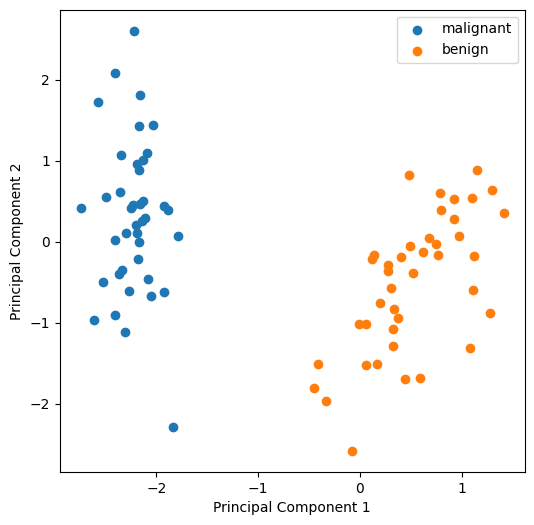

In [40]:
# Plot a scatter print using the principal components
plt.figure(figsize=(6, 6))
for x in np.unique(bc_label):
    data_slice = x_train_pca[y_train == x]
    plt.scatter(data_slice[:, 0], data_slice[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bc_data.target_names)
plt.show()